In [90]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import statsmodels as sm
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,6

In [75]:
dataset = pd.read_excel("water_data.xlsx")
dataset['Time'] = pd.to_datetime(dataset.Time)
indexedDataset = dataset.set_index(['Time'])

In [76]:
indexedDataset.head()

,Volume
Time,
2019-02-13 01:49:00,9.736310e+05
2019-02-13 04:30:00,1.064503e+06
2019-02-13 04:30:00,1.064503e+06
2019-02-13 04:31:00,1.064503e+06
2019-02-13 04:32:00,1.064503e+06


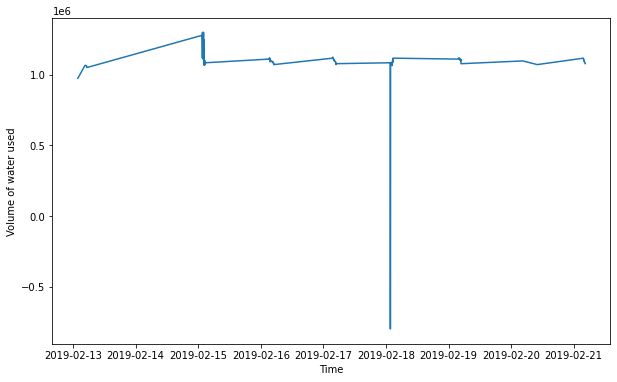

In [77]:
plt.xlabel("Time")
plt.ylabel("Volume of water used")
plt.plot(indexedDataset)

In [78]:
#Determining rolling statistics

rolmean = indexedDataset.rolling(window = 150).mean()

rolstd = indexedDataset.rolling(window = 150).std()
print(rolmean,rolstd)

                           Volume
Time                             
2019-02-13 01:49:00           NaN
2019-02-13 04:30:00           NaN
2019-02-13 04:30:00           NaN
2019-02-13 04:31:00           NaN
2019-02-13 04:32:00           NaN
...                           ...
2019-02-21 04:23:00  1.095183e+06
2019-02-21 04:23:00  1.094967e+06
2019-02-21 04:23:00  1.094751e+06
2019-02-21 04:23:00  1.094534e+06
2019-02-21 04:23:00  1.094318e+06

[1329 rows x 1 columns]                           Volume
Time                            
2019-02-13 01:49:00          NaN
2019-02-13 04:30:00          NaN
2019-02-13 04:30:00          NaN
2019-02-13 04:31:00          NaN
2019-02-13 04:32:00          NaN
...                          ...
2019-02-21 04:23:00  9052.201383
2019-02-21 04:23:00  9084.940764
2019-02-21 04:23:00  9112.392315
2019-02-21 04:23:00  9134.603711
2019-02-21 04:23:00  9151.613106

[1329 rows x 1 columns]


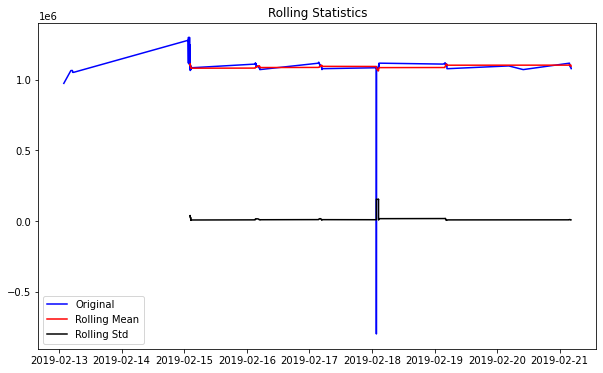

In [79]:
original = plt.plot(indexedDataset,color='blue',label='Original')
mean = plt.plot(rolmean,color='red',label='Rolling Mean')
std = plt.plot(rolstd, color='black',label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Statistics')
plt.show(block=False)

/home/manas/anaconda3/lib/python3.9/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


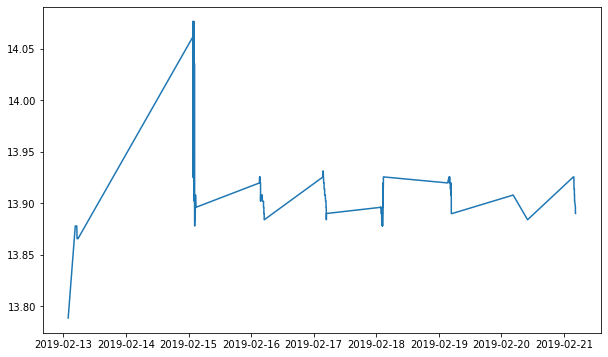

In [80]:
#Estimating trend

indexedDataset_logScale = np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

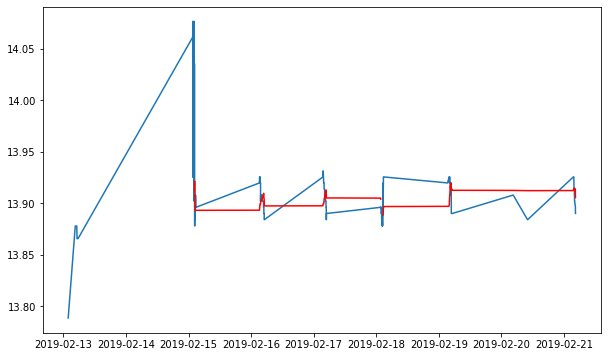

In [81]:
movingAverage = indexedDataset_logScale.rolling(window=150).mean()
movingStd = indexedDataset_logScale.rolling(window=150).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage,color='red')

In [82]:
datasetLogScaleMinusMovingAverage = indexedDataset_logScale - movingAverage


#Removing NAN Values

datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,Volume
Time,
2019-02-15 02:12:00,-0.004856
2019-02-15 02:12:00,-0.005651
2019-02-15 02:12:00,-0.011747
2019-02-15 02:12:00,-0.011907
2019-02-15 02:12:00,-0.012068
2019-02-15 02:13:00,-0.012229
2019-02-15 02:13:00,-0.006494
2019-02-15 02:13:00,-0.012589
2019-02-15 02:13:00,-0.012750


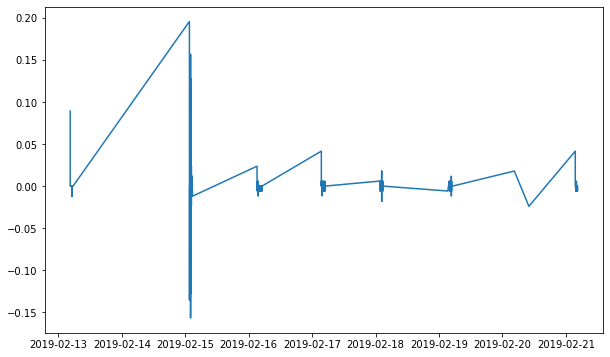

In [83]:
datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

/home/manas/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/manas/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/manas/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Plotting AR model


/home/manas/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


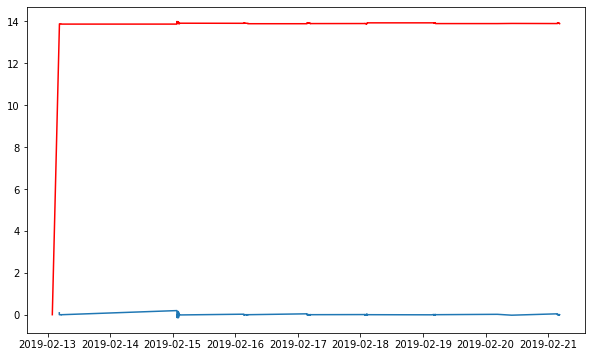

In [84]:
from statsmodels.tsa.arima.model import ARIMA

#AR MODEL

model = ARIMA(indexedDataset_logScale, order = (2,1,0))
results_AR = model.fit()
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
print("Plotting AR model")

/home/manas/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/manas/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/manas/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Plotting MA model


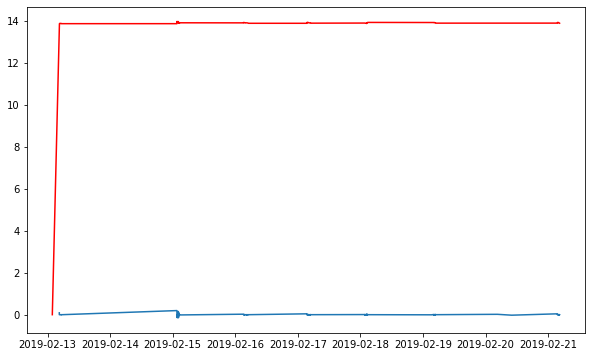

In [85]:
#MA MODEL
model = ARIMA(indexedDataset_logScale,order=(0,1,2))
results_MA = model.fit()
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues,color='red')
print("Plotting MA model")

/home/manas/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/manas/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/manas/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


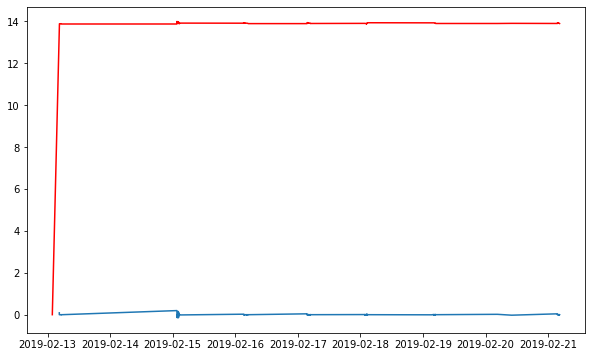

In [86]:
model = ARIMA(indexedDataset_logScale, order=(2,1,2))
results_ARIMA = model.fit()
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues,color='red')

In [87]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues,copy=True)
print(predictions_ARIMA_diff.head())

Time
2019-02-13 01:49:00     0.000000
2019-02-13 04:30:00    13.788788
2019-02-13 04:30:00    13.838283
2019-02-13 04:31:00    13.840409
2019-02-13 04:32:00    13.871871
dtype: float64


In [88]:
#Convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Time
2019-02-13 01:49:00     0.000000
2019-02-13 04:30:00    13.788788
2019-02-13 04:30:00    27.627071
2019-02-13 04:31:00    41.467480
2019-02-13 04:32:00    55.339351
dtype: float64


/home/manas/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


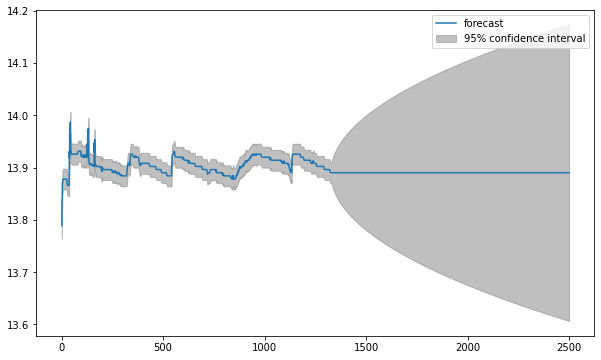

In [99]:
from statsmodels.graphics.tsaplots import plot_predict
fig = plot_predict(results_ARIMA,1,2500)